http://bagrow.com/dsv/heatmap_basemap.html

In [24]:
import csv
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd

Загрузка и подготовка данных

In [25]:
raw_data = pd.read_csv('earthquake_data.csv')
raw_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-12-28T05:56:47.674Z,61.3705,-150.004500,43.90,1.60,ml,NaN,NaN,NaN,0.98,...,2018-12-28T06:02:01.688Z,"17km NNW of Anchorage, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
1,2018-12-28T05:47:33.184Z,60.6839,-152.223200,83.80,2.10,ml,NaN,NaN,NaN,0.63,...,2018-12-28T05:51:37.999Z,"36km NE of Redoubt Volcano, Alaska",earthquake,NaN,1.20,NaN,NaN,automatic,ak,ak
2,2018-12-28T05:43:57.730Z,33.3690,-116.957001,0.13,1.14,ml,10.0,132.0,0.1939,0.18,...,2018-12-28T05:47:38.313Z,"9km W of Palomar Observatory, CA",earthquake,0.69,1.41,0.084,3.0,automatic,ci,ci
3,2018-12-28T05:31:26.398Z,61.4404,-150.039200,43.60,1.50,ml,NaN,NaN,NaN,0.76,...,2018-12-28T05:36:23.600Z,"10km SSW of Big Lake, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2018-12-28T05:23:33.090Z,19.1726,-67.242600,36.00,3.24,md,18.0,291.0,0.7172,0.53,...,2018-12-28T05:54:22.252Z,"76km NNW of San Antonio, Puerto Rico",earthquake,2.74,13.56,0.350,15.0,reviewed,pr,pr


In [26]:
selection = (raw_data.latitude>25) & (raw_data.latitude<55) & (raw_data.longitude>-130) & (raw_data.longitude<-100)

In [27]:
data = raw_data[~selection]

In [28]:
print ' Размер данных до фильтрафции: {}\n Размер даннных после фильтрафии: {}'.format(raw_data.shape, data.shape)

 Размер данных до фильтрафции: (1554, 22)
 Размер даннных после фильтрафии: (1113, 22)


Подготовка значений  матрицы плотности и координат для heatmap

In [ ]:
db = 1 #шаг bins
lon_bins = np.linspace(min(data.longitude) - db, max(data.longitude) + db, 10+1) #10 bins
lat_bins = np.linspace(min(data.latitude) - db, max(data.latitude)+ db, 13+1) #13 bins
density, _, _ = np.histogram2d(data.latitude, data.longitude, [lat_bins, lon_bins])

lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

Отрисовка карты

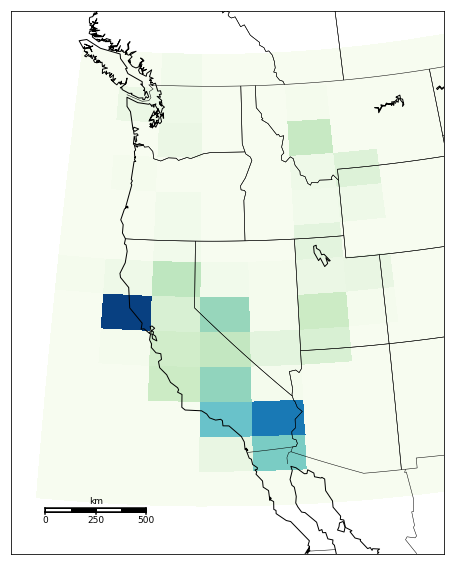

In [54]:
plt.figure(figsize = (15, 10))
m  = Basemap(projection='ortho',lon_0=-119,lat_0=37,resolution='l',
             llcrnrx=-1000*1000,llcrnry=-1000*1000,
             urcrnrx=+1150*1000,urcrnry=+1700*1000)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

xs, ys = m(lon_bins_2d, lat_bins_2d)
plt.pcolormesh(xs, ys, density, cmap = 'GnBu')

x, y = m(data.longitude.values, data.latitude.values)
m.plot(x, y, '*', markersize = 20)


m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)

plt.show()